# Multinomial Logistic Regression

We used logistic regression for categorical dependent variables that are binary; they had only two categories. If we have multiple categories to predict, we should use [**Multinomial Logistic Regression**](https://peopleanalytics-regression-book.org/multinomial-logistic-regression-for-nominal-category-outcomes.html).

It is a regression model where the **dependent variable is categorical and has multiple categories**. 

The multinomial logistic regression estimates a separate binary logistic regression model for each category in comparison to a reference category. It takes one category as baseline and computes the odds of being in the different outcome categories in reference to the baseline. So for example, for three categories (1,2,3) of a dependent variable $A$, it would compute two different sets of regression results corresponding to the two models of 

$$log(\frac{Pr(A=2)}{Pr(A=1)}) $$



$$log(\frac{Pr(A=3)}{Pr(A=1)}) $$

if the baseline was chosen as category 1. 


### The Data

We will use the simple iris data set that has three categories in its dependent variable `Species`. 



In [1]:
library(car)

head(iris)

Loading required package: carData



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



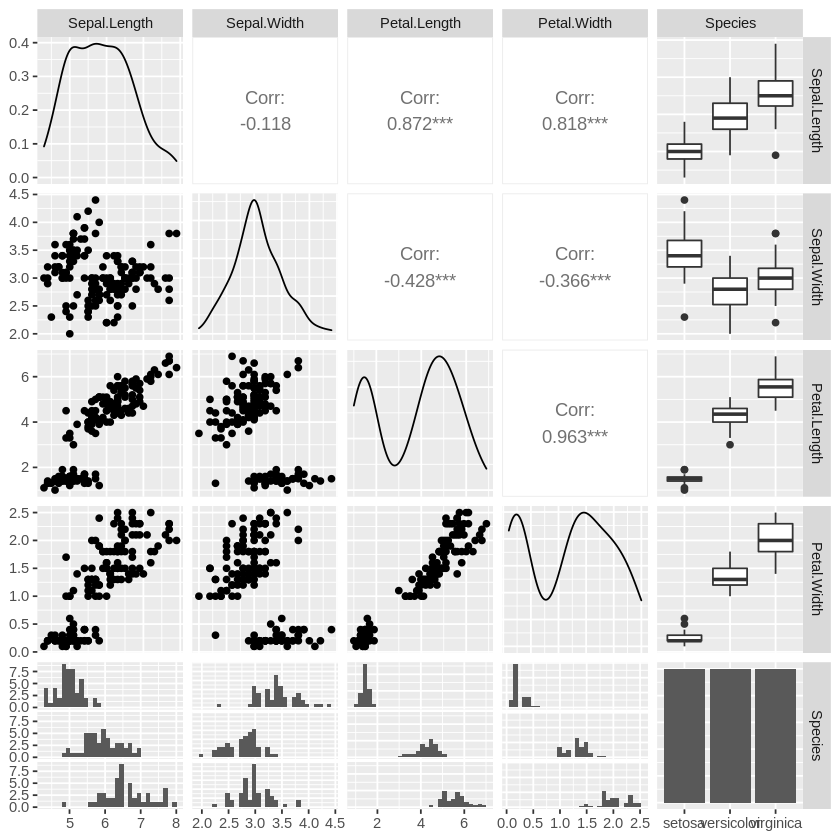

In [2]:
library(GGally)
ggpairs(iris)

In [3]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

There are three species labeled as `setosa`, `versicolor`, and `virginica`. We will use the `multinom()` function from the `nnet` library. We will use all available variables in the data set, so the formula is `Species ~ .`. We will choose `setosa` as the base category, arbitrarily. 





In [4]:
iris$Species= relevel(iris$Species, ref="setosa")

library(nnet)

model_sp <- multinom(Species ~ ., data=iris)

# weights:  18 (10 variable)
initial  value 164.791843 
iter  10 value 16.177348
iter  20 value 7.111438
iter  30 value 6.182999
iter  40 value 5.984028
iter  50 value 5.961278
iter  60 value 5.954900
iter  70 value 5.951851
iter  80 value 5.950343
iter  90 value 5.949904
iter 100 value 5.949867
final  value 5.949867 
stopped after 100 iterations


In [5]:
summary(model_sp)

Call:
multinom(formula = Species ~ ., data = iris)

Coefficients:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    18.69037    -5.458424   -8.707401     14.24477   -3.097684
virginica    -23.83628    -7.923634  -15.370769     23.65978   15.135301

Std. Errors:
           (Intercept) Sepal.Length Sepal.Width Petal.Length Petal.Width
versicolor    34.97116     89.89215    157.0415     60.19170    45.48852
virginica     35.76649     89.91153    157.1196     60.46753    45.93406

Residual Deviance: 11.89973 
AIC: 31.89973 


The summary shows the coefficients and the standard errors for the respective models. Note that there are "versicolor" and "virginica" on the sides referring to the two separate models. These models compare the probability of "versicolor" to "setosa" and "virginica" to "setosa", respectively. 

The predicted values are probabilities for each category. To decide for a category label, we choose the category with the highest probability. You can see the rounded probabilities below for each category of Species. 





In [6]:
tail(round(fitted(model_sp),4))

,setosa,versicolor,virginica
145,0,0.0000,1.0000
146,0,0.0000,1.0000
147,0,0.0009,0.9991
148,0,0.0010,0.9990
149,0,0.0000,1.0000
150,0,0.0224,0.9776


Let's create a confusion table. Similar to the one we have created for logistic regression, our confusion table will have as many rows/columns as the number of categories. 

In [7]:
# Predicting the values for the whole data set 
pred_sp <- predict(model_sp, newdata = iris, "class") # "class" tells to create labels instead of probabilities 
 
# Building confusion matrix 
ctable <- table(iris$Species, pred_sp)
ctable 

# Calculating accuracy - sum of diagonal elements divided by total observations 
print(paste("accuracy = ",round((sum(diag(ctable))/sum(ctable))*100,2)))

            pred_sp
             setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         49         1
  virginica       0          1        49

[1] "accuracy =  98.67"


Setosa is well separated and there is only one confusion between versicolor and virginica. Let's see if we can build a model that can generalize well. For that, we need to split our data into training and testing sets. 



### Training and Testing Sets 

Let's split the data set randomly into a training set and a testing set.


In [13]:
library(caTools)

In [14]:
set.seed(999) # set.seed() will help us to reproduce the results.
split = sample.split(iris$Species, SplitRatio=0.7)

In [15]:
train_data  = subset(iris, split==TRUE)

test_data  = subset(iris, split==FALSE)

In [16]:
model_sp2 <- multinom(Species ~ ., data=train_data)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 12.142868
iter  20 value 4.693439
iter  30 value 4.581109
iter  40 value 4.557622
iter  50 value 4.554405
iter  60 value 4.553749
iter  70 value 4.553305
iter  80 value 4.553017
iter  90 value 4.552788
iter 100 value 4.552628
final  value 4.552628 
stopped after 100 iterations


We test our model using the testing set. As computed below, our model can do well for unseen data. It can generalize well instead of memorizing the training set. 

In [17]:
# Predicting the values for TEST data
pred_sp2 <- predict(model_sp2, newdata = test_data, "class") # "class" tells to create labels instead of probabilities 
 
# Building confusion matrix 
ctable2 <- table(test_data$Species, pred_sp2)
ctable2 

# Calculating accuracy - sum of diagonal elements divided by total observations 
print(paste("accuracy = ",round((sum(diag(ctable2))/sum(ctable2))*100,2)))

            pred_sp2
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         15         0
  virginica       0          1        14

[1] "accuracy =  97.78"


# Save your notebook